In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Video and Image Merged

In [27]:
image = cv2.imread("image\Fotolia_94207102_Subscription_Monthly_M.jpg")
image2 = cv2.imread("image\\bird.jpg")

In [28]:
type(image2)

numpy.ndarray

In [29]:
type(image)

numpy.ndarray

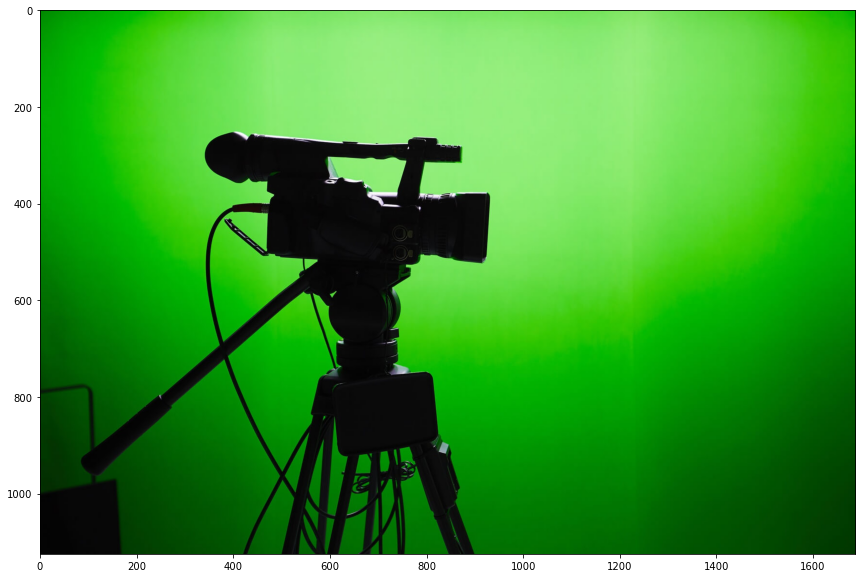

In [30]:
rgb_img= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)            

plt.figure(figsize= (15, 10))
plt.imshow(rgb_img)

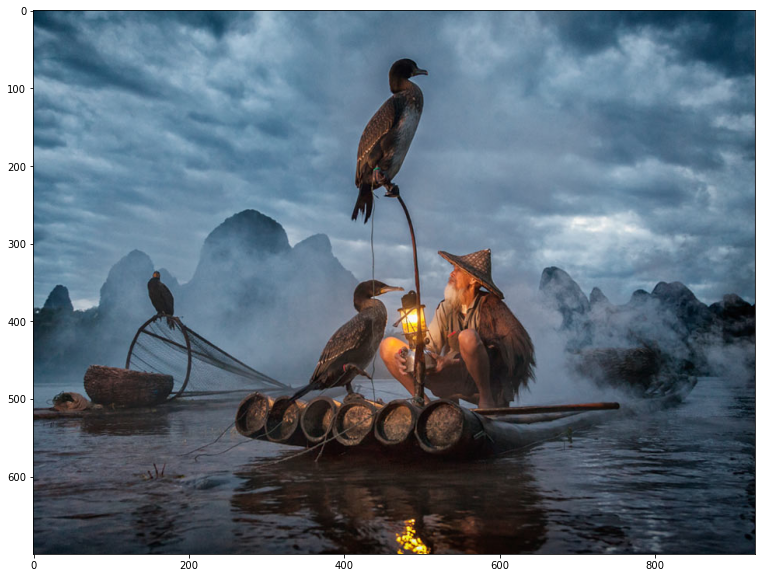

In [31]:
rgb_img2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)            

plt.figure(figsize= (15, 10))
plt.imshow(rgb_img2)

In [32]:
rgb_img = cv2.resize(rgb_img, (640, 480))
rgb_img2 = cv2.resize(rgb_img2, (640, 480))

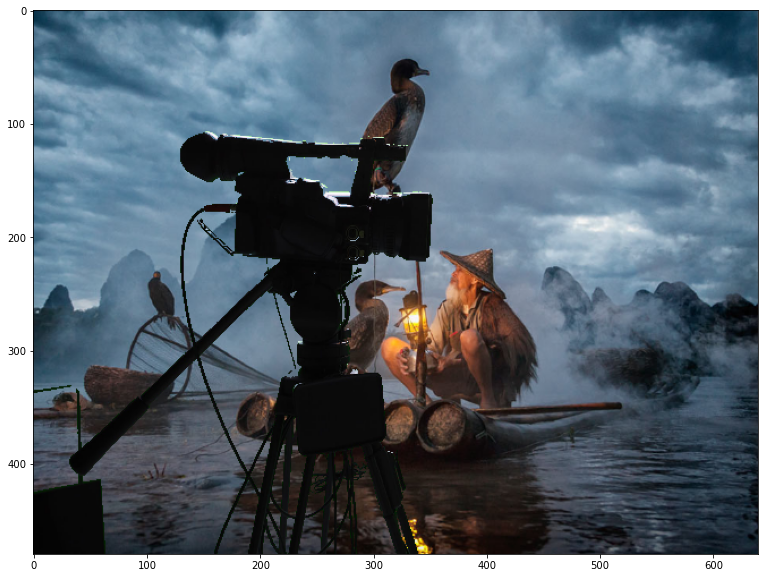

In [33]:
lower_green = np.array([0, 40, 0]) 
upper_green = np.array([160, 255, 190])

mask = cv2.inRange(rgb_img, lower_green, upper_green)

rgb_img[mask != 0] = [0,0,0]
rgb_img2[mask == 0] = [0,0,0]

merged = cv2.add(rgb_img, rgb_img2)

plt.figure(figsize = (15, 10))
plt.imshow(merged)